# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.to_csv("../data/raw/total_data.csv", index = False)

In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Cuales son los duplicados
duplicates = df.duplicated()

In [7]:
df.duplicated(subset='id').sum()

np.int64(0)

In [8]:

df.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True, errors='ignore')
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [9]:
print(df.select_dtypes(include=['object', 'category']))

      neighbourhood_group       neighbourhood        room_type
0                Brooklyn          Kensington     Private room
1               Manhattan             Midtown  Entire home/apt
2               Manhattan              Harlem     Private room
3                Brooklyn        Clinton Hill  Entire home/apt
4               Manhattan         East Harlem  Entire home/apt
...                   ...                 ...              ...
48890            Brooklyn  Bedford-Stuyvesant     Private room
48891            Brooklyn            Bushwick     Private room
48892           Manhattan              Harlem  Entire home/apt
48893           Manhattan      Hell's Kitchen      Shared room
48894           Manhattan      Hell's Kitchen     Private room

[48895 rows x 3 columns]


In [10]:
print(df.dtypes)

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [12]:
df.minimum_nights.value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
275        1
182        1
114        1
85         1
36         1
Name: count, Length: 109, dtype: int64

In [13]:
df.price.value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
1080       1
1299       1
1295       1
519        1
1978       1
Name: count, Length: 674, dtype: int64

In [14]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [15]:
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [16]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

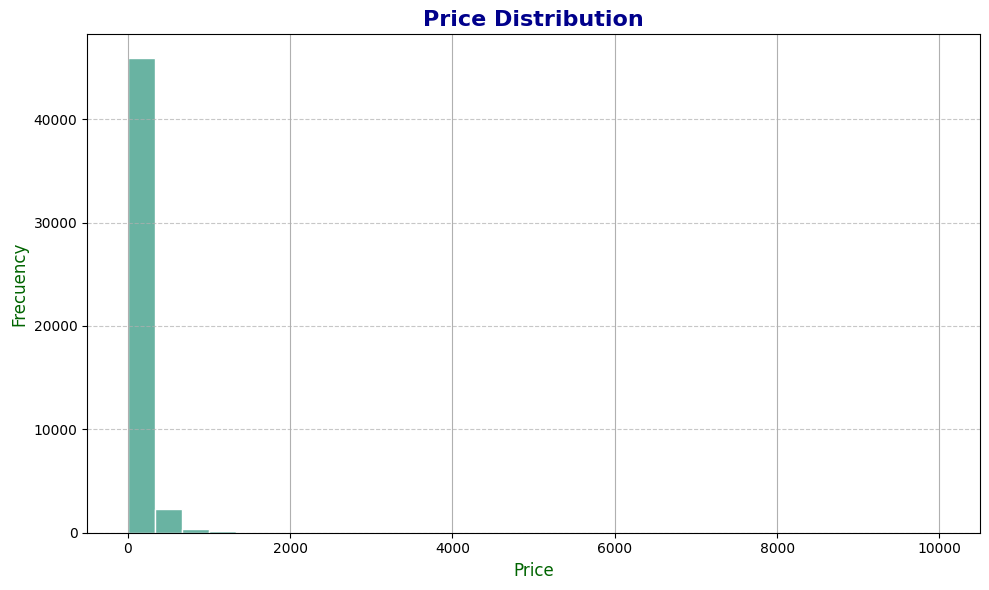

In [17]:
plt.figure(figsize=(10, 6))
df['price'].hist(bins=30, edgecolor='white', color='#69b3a2')
plt.title('Price Distribution', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel('Price', fontsize=12, color='darkgreen')
plt.ylabel('Frecuency', fontsize=12, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

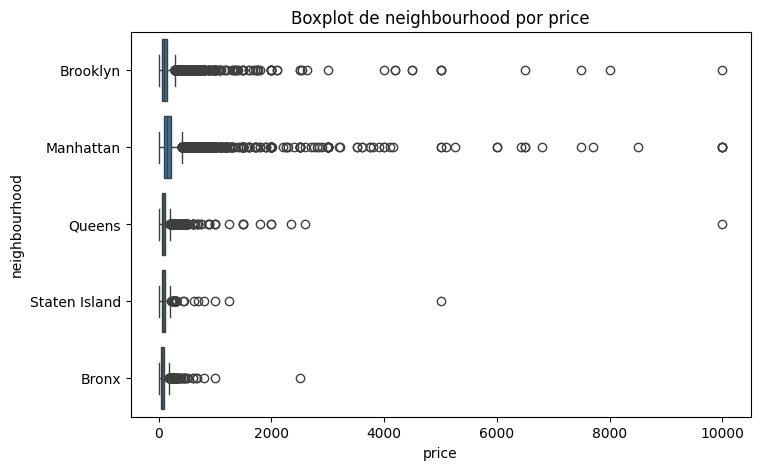

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [18]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='price', y='neighbourhood_group', data=df)

plt.title('Boxplot de neighbourhood por price')
plt.xlabel('price')
plt.ylabel('neighbourhood')
plt.show()
df.describe()

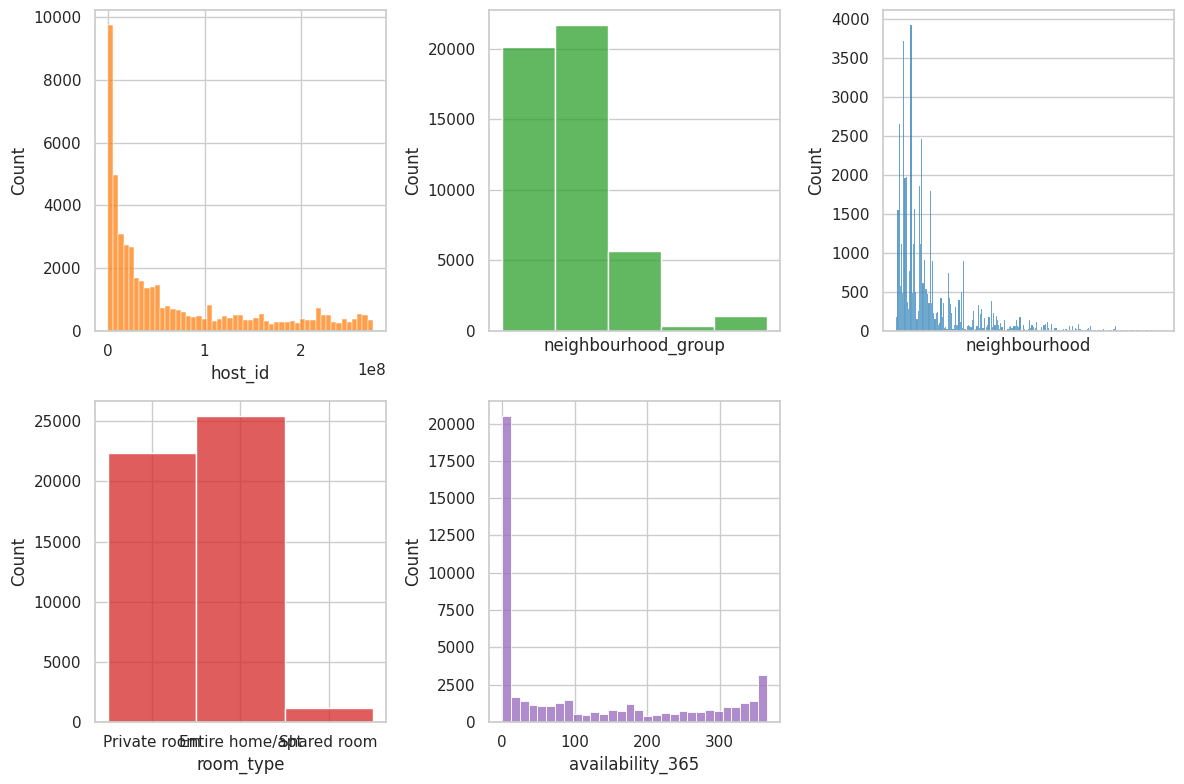

In [19]:


sns.set(style="whitegrid")  

fig, axis = plt.subplots(2, 3, figsize=(12, 8))


colores = ['#FF7F0E', '#2CA02C', '#1F77B4', '#D62728', '#9467BD']

sns.histplot(ax=axis[0, 0], data=df, x="host_id", color=colores[0])
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood_group", color=colores[1]).set_xticks([])
sns.histplot(ax=axis[0, 2], data=df, x="neighbourhood", color=colores[2]).set_xticks([])
sns.histplot(ax=axis[1, 0], data=df, x="room_type", color=colores[3])
sns.histplot(ax=axis[1, 1], data=df, x="availability_365", color=colores[4])

fig.delaxes(axis[1, 2])

plt.tight_layout()

plt.show()

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


Numeric Variables analysis

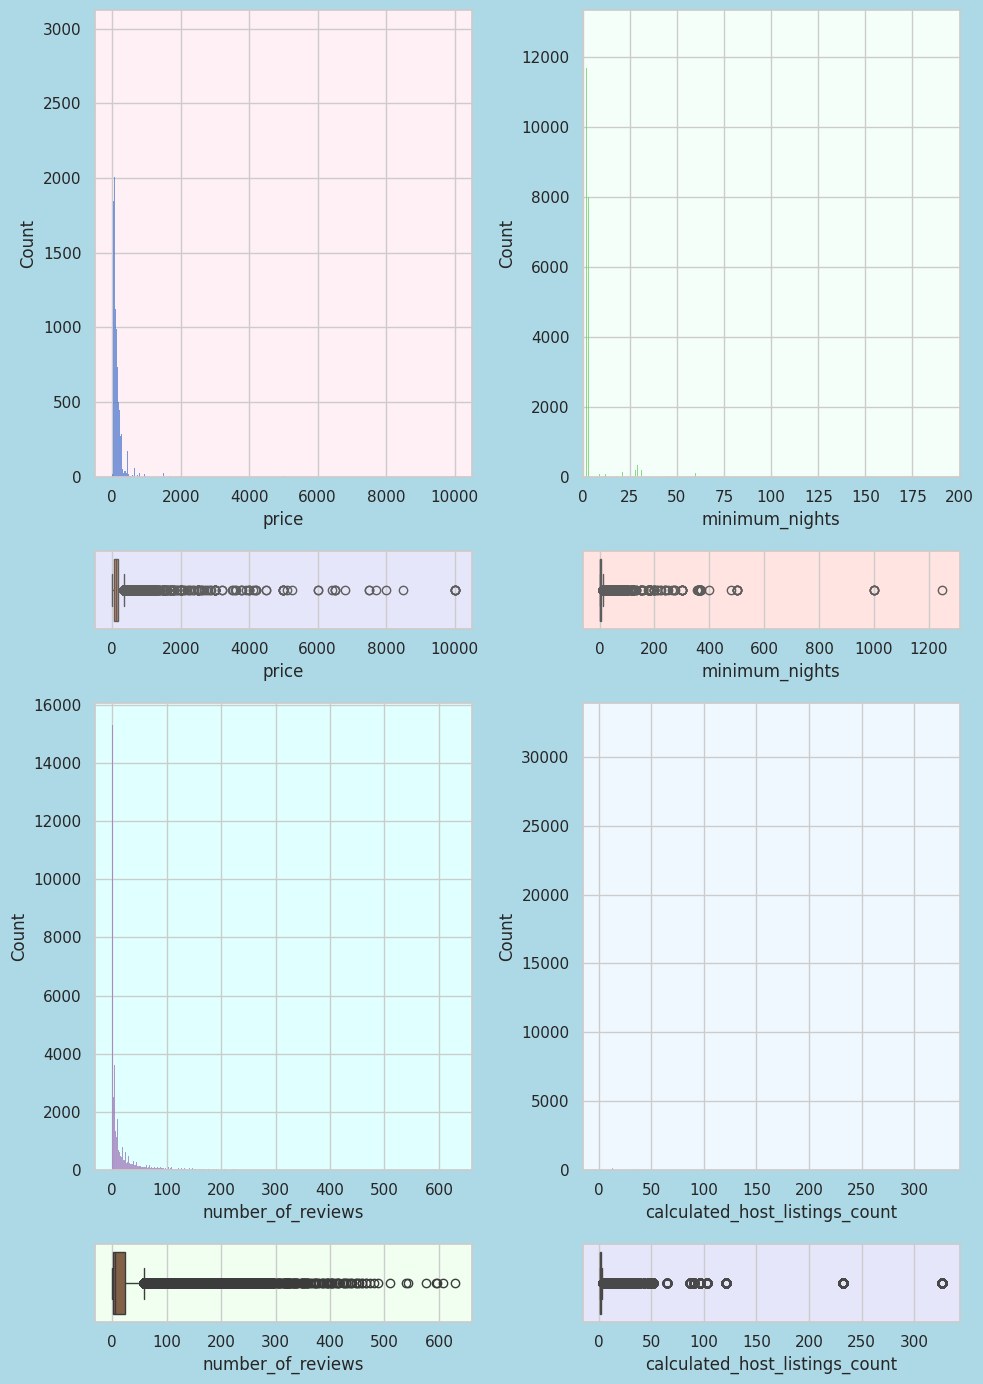

In [21]:

fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

colors = sns.color_palette("muted", 8)

fig.patch.set_facecolor('lightblue')

axis[0, 0].set_facecolor('lavenderblush')
axis[1, 0].set_facecolor('lavender')
axis[0, 1].set_facecolor('mintcream')
axis[1, 1].set_facecolor('mistyrose')
axis[2, 0].set_facecolor('lightcyan')
axis[3, 0].set_facecolor('honeydew')
axis[2, 1].set_facecolor('aliceblue')
axis[3, 1].set_facecolor('lavender')

sns.histplot(ax=axis[0, 0], data=df, x="price", color=colors[0])
sns.boxplot(ax=axis[1, 0], data=df, x="price", color=colors[1])

sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", color=colors[2]).set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights", color=colors[3])

sns.histplot(ax=axis[2, 0], data=df, x="number_of_reviews", color=colors[4])
sns.boxplot(ax=axis[3, 0], data=df, x="number_of_reviews", color=colors[5])

sns.histplot(ax=axis[2, 1], data=df, x="calculated_host_listings_count", color=colors[6])
sns.boxplot(ax=axis[3, 1], data=df, x="calculated_host_listings_count", color=colors[7])

plt.tight_layout()

plt.show()

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

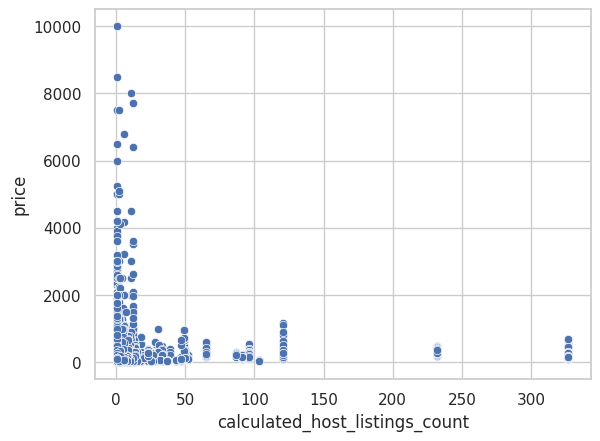

In [22]:
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price')

<Axes: xlabel='number_of_reviews', ylabel='price'>

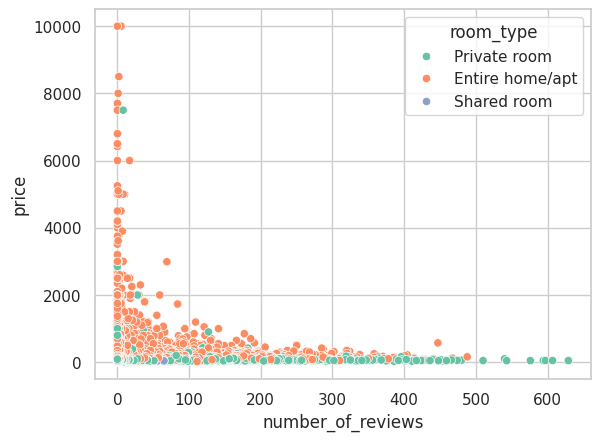

In [23]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette='Set2')


<Axes: xlabel='availability_365', ylabel='price'>

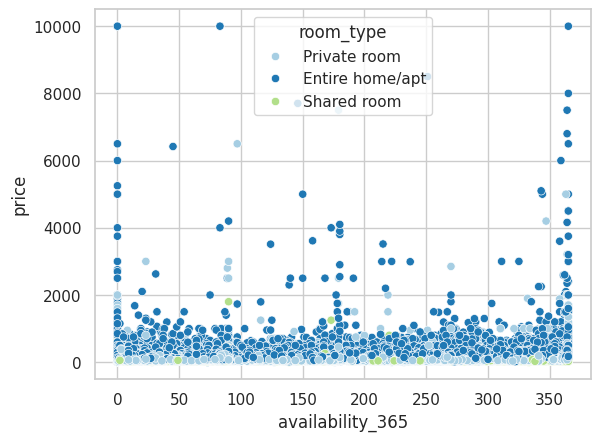

In [25]:
sns.scatterplot(data=df, x='availability_365', y='price', hue='room_type', palette='Paired')


<Axes: xlabel='latitude', ylabel='price'>

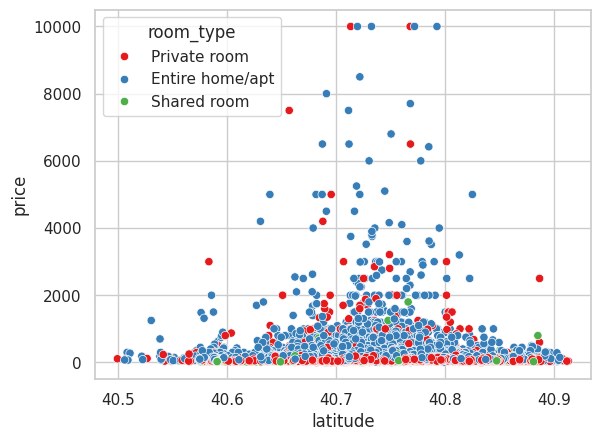

In [26]:
sns.scatterplot(data=df, x='latitude', y='price', hue='room_type', palette='Set1')


<Axes: xlabel='longitude', ylabel='price'>

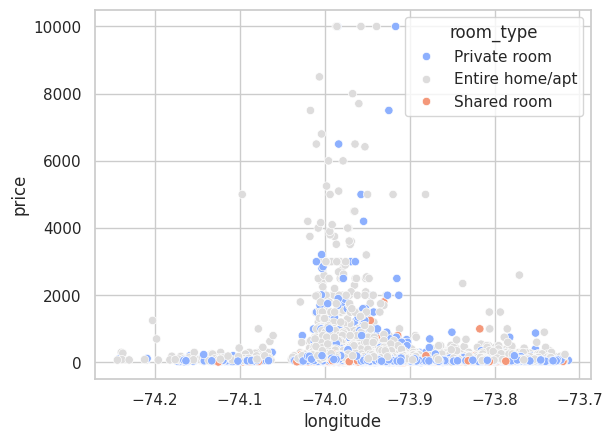

In [27]:
sns.scatterplot(data=df, x='longitude', y='price', hue='room_type', palette='coolwarm')


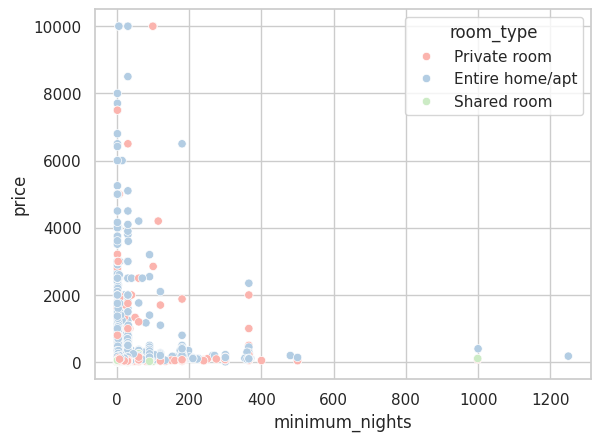

In [28]:
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='room_type', palette='Pastel1')

plt.show()

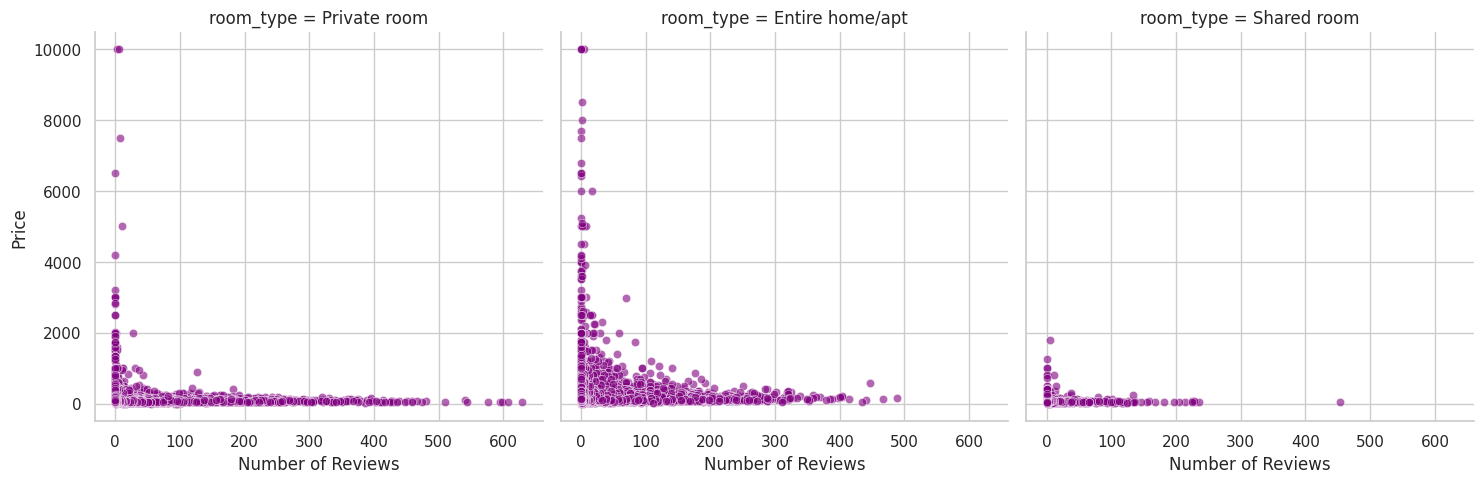

In [29]:
g = sns.FacetGrid(df, col="room_type", height=5, col_wrap=3)

g.map(sns.scatterplot, 'number_of_reviews', 'price', alpha=0.6, color='purple')

g.set_axis_labels('Number of Reviews', 'Price')

plt.show()

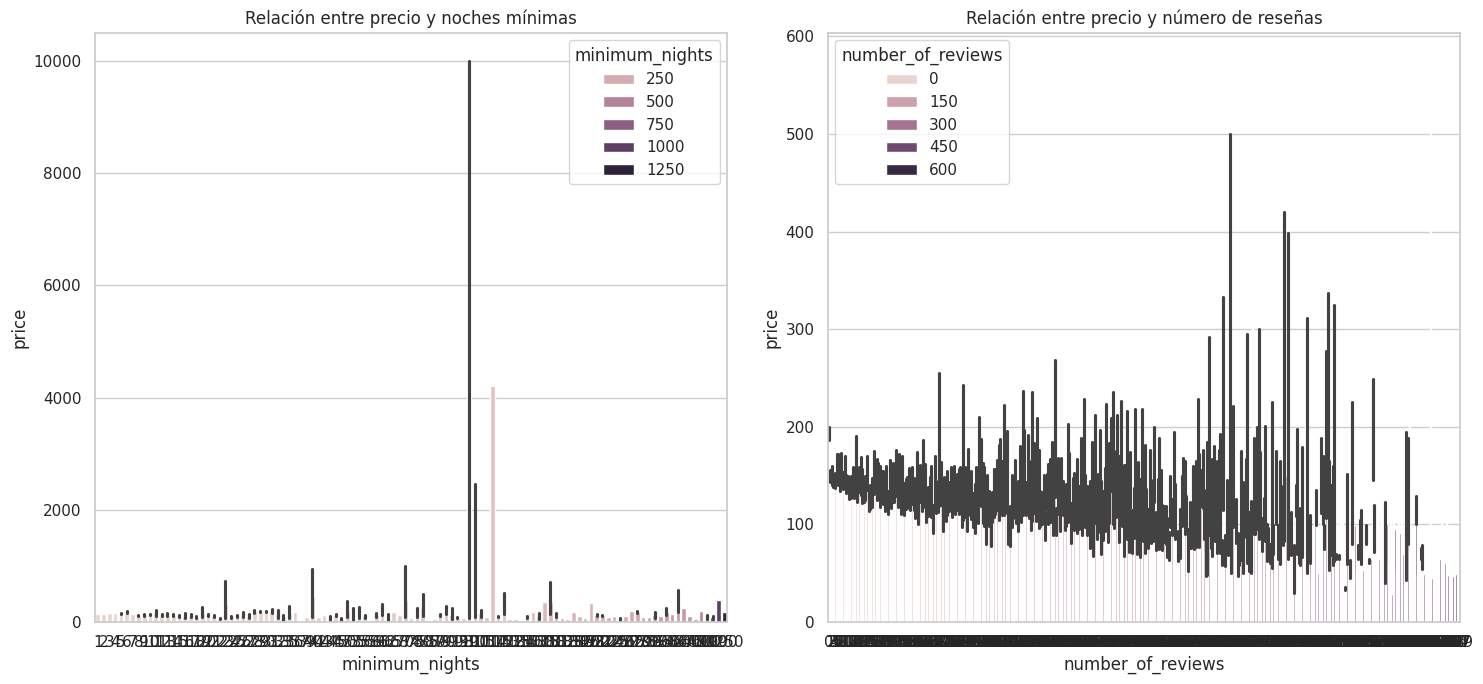

In [30]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=2)

sns.barplot(ax=axis[0], data=df, x="minimum_nights", y="price", hue="minimum_nights")
axis[0].set_title('Relación entre precio y noches mínimas')

sns.barplot(ax=axis[1], data=df, x="number_of_reviews", y="price", hue="number_of_reviews")
axis[1].set_title('Relación entre precio y número de reseñas')

plt.tight_layout()


plt.show()

In [31]:
df[['price', 'calculated_host_listings_count']].corr()

,price,calculated_host_listings_count
price,1.000000,0.057472
calculated_host_listings_count,0.057472,1.000000


In [32]:
df.groupby('calculated_host_listings_count')['price'].mean()

calculated_host_listings_count
1      158.677677
2      127.799790
3      122.193831
4      119.915972
5      120.501775
6      149.477193
7      104.378446
8      111.894231
9      118.320513
10     120.009524
11     453.581818
12     406.483333
13     150.876923
14     191.542857
15      94.813333
16     127.750000
17      88.485294
18     253.740741
19      88.789474
20     154.500000
21     158.095238
23     158.898551
25     147.500000
26      62.346154
27      47.888889
28     145.732143
29     121.965517
30     213.133333
31     159.354839
32      59.937500
33     201.838384
34      95.764706
37      35.945946
39     190.769231
43      48.139535
47     102.106383
49     484.112245
50     171.700000
52     126.134615
65     290.230769
87     215.436782
91     146.241758
96     210.994792
103     43.825243
121    277.528926
232    303.150862
327    253.195719
Name: price, dtype: float64

Numerical-Numerical Analysis

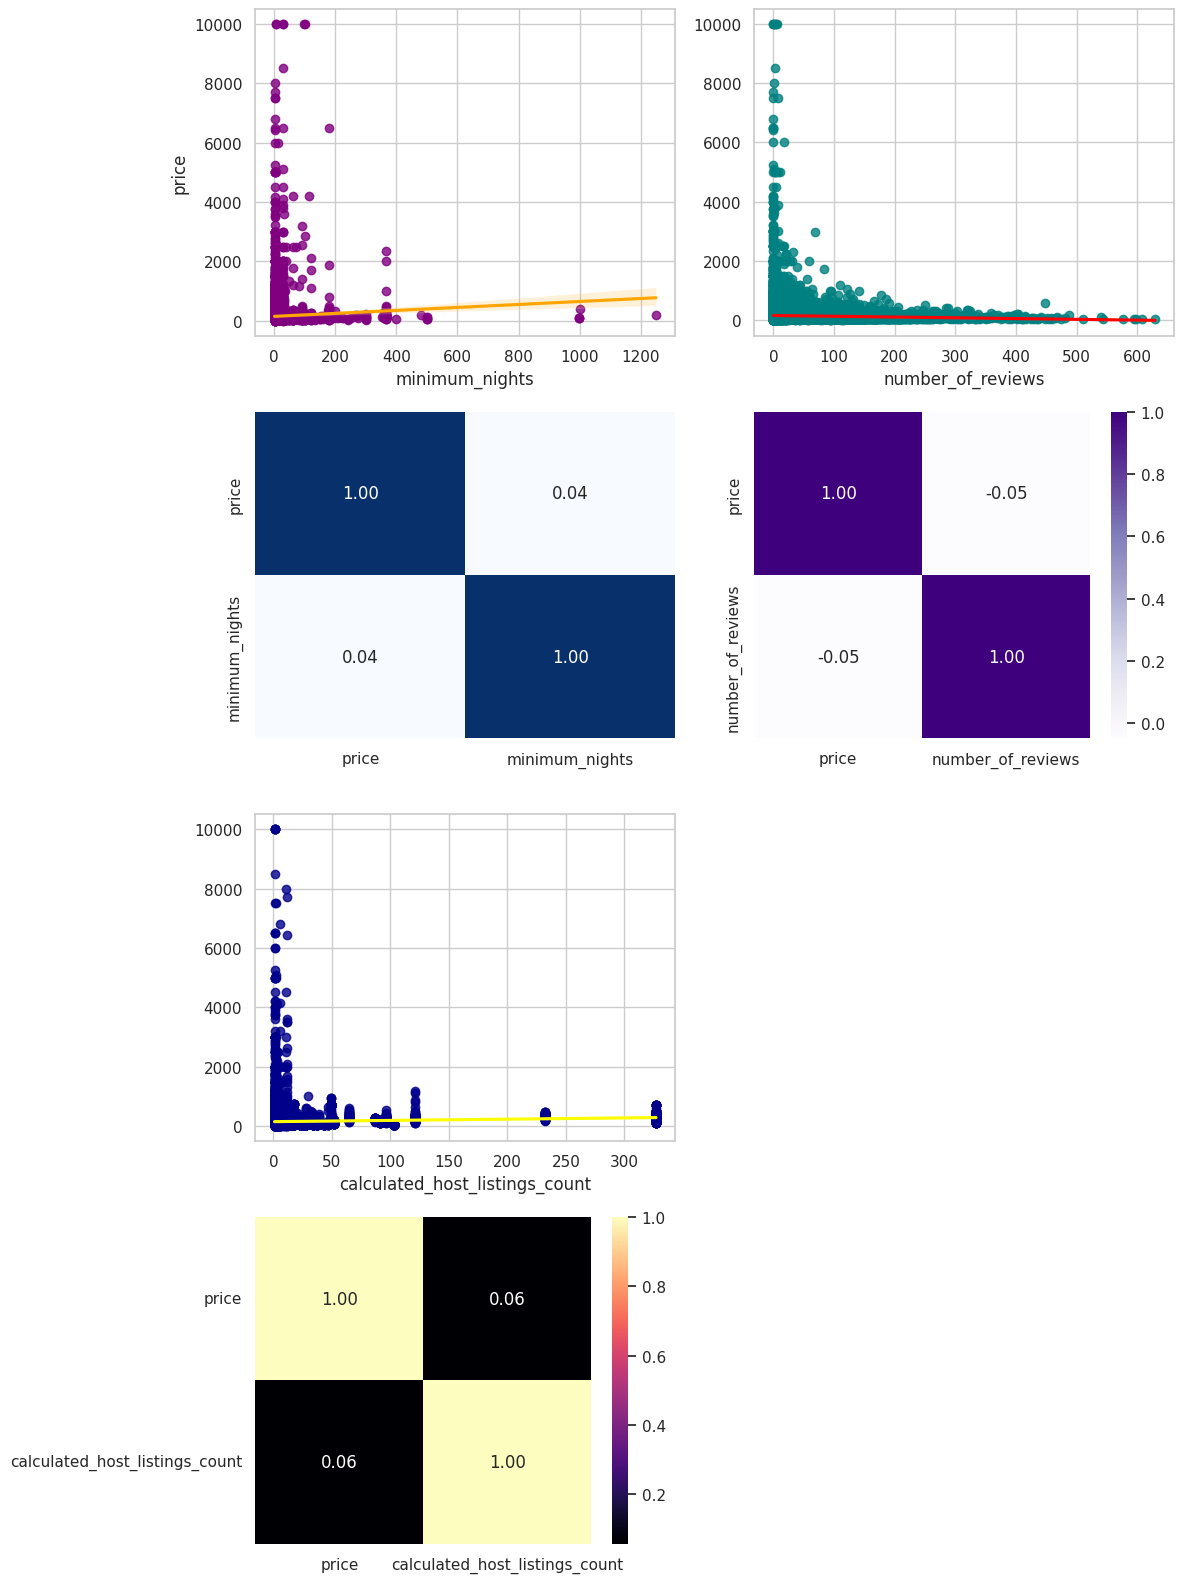

In [37]:
fig, axis = plt.subplots(4, 2, figsize=(12, 16))

sns.regplot(ax=axis[0, 0], data=df, x="minimum_nights", y="price", scatter_kws={'color': 'purple'}, line_kws={'color': 'orange'})
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap="Blues")

sns.regplot(ax=axis[0, 1], data=df, x="number_of_reviews", y="price", scatter_kws={'color': 'teal'}, line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap="Purples")

sns.regplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count", y="price", scatter_kws={'color': 'darkblue'}, line_kws={'color': 'yellow'}).set(ylabel=None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cmap="magma").set(ylabel=None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Categorical-Categorical analysis

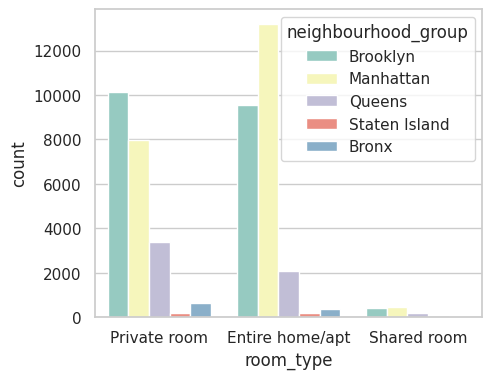

In [40]:
fig, axis = plt.subplots(figsize=(5, 4))

sns.countplot(data=df, x="room_type", hue="neighbourhood_group", palette="Set3")

plt.show()

In [42]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['room_type'], df['neighbourhood_group'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Valor p:", p)
if p < 0.05:
    print("Las variables son dependientes (relación significativa).")
else:
    print("No hay relación significativa entre las variables.")

ModuleNotFoundError: No module named 'scipy'